In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import numpy as np
from tensorflow.keras.utils import set_random_seed

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
def make_plot(x, y_test, y_train, title = 'Title', x_label = 'x', y_label = 'y'):
    plt.figure()
    plt.scatter(x, y_test)
    plt.scatter(x, y_train)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(['Testing','Training'])
    plt.show()

In [3]:
set_random_seed(53)
def create_model(number_of_features, layers, nodes, learning, mode = 'constant'):
    model = Sequential()
    model.add(Input(shape = (number_of_features,)))
    
    if mode == 'constant':
        for n in range(layers):
            model.add(Dense(nodes, activation = 'relu'))
            
    elif mode == 'reduce':
        for n in range(layers):
            model.add(Dense(nodes - n*(nodes-2)//(layers-1), activation = 'relu'))
            
    model.add(Dense(1, activation = 'linear'))
    opt = Adam(learning_rate = learning)
    model.compile(loss = 'mse', optimizer = opt, metrics = ['mean_squared_error'])
    return model

In [4]:
heart = pd.read_csv("heart_attack.csv")
pd.set_option('display.max_columns', None)
heart

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [5]:
heart.pop('Patient ID')
heart.pop('Continent')
heart.pop('Hemisphere')

heart[['Systolic', 'Diastolic']] = heart['Blood Pressure'].str.split('/', expand = True)
heart.pop('Blood Pressure')

label_cols = ['Country']
heart[label_cols] = heart[label_cols].apply(LabelEncoder().fit_transform)

one_hot_sex = pd.get_dummies(heart['Sex'])
one_hot_diet = pd.get_dummies(heart['Diet'])
heart = pd.concat([heart, one_hot_sex, one_hot_diet], axis = 1)
heart.pop('Sex')
heart.pop('Diet')

pd.set_option('display.max_columns', None)
heart

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Systolic,Diastolic,Female,Male,Average,Healthy,Unhealthy
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,0,0,158,88,False,True,True,False,False
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,3,0,165,93,False,True,False,False,True
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,6,0,174,99,True,False,False,True,False
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,3,0,163,100,False,True,True,False,False
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,16,0,91,88,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,1,1,8,10.806373,235420,19.655895,67,7,7,16,0,94,76,False,True,False,True,False
8759,28,120,73,1,0,0,1,0,16.558426,0,0,8,3.833038,217881,23.993866,617,4,9,3,0,157,102,True,False,False,True,False
8760,47,250,105,0,1,1,1,1,3.148438,1,0,5,2.375214,36998,35.406146,527,4,4,2,1,161,75,False,True,True,False,False
8761,36,178,60,1,0,1,0,0,3.789950,1,1,5,0.029104,209943,27.294020,114,2,8,2,0,119,67,False,True,False,False,True


In [6]:
y = heart.pop('BMI')
X = heart

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 53)

220/220 [==============================] - 0s 1ms/step
Done with layers: 10
220/220 [==============================] - 0s 783us/step
Done with layers: 11
220/220 [==============================] - 0s 774us/step
Done with layers: 12
220/220 [==============================] - 0s 792us/step
Done with layers: 13
220/220 [==============================] - 0s 811us/step
Done with layers: 14
220/220 [==============================] - 0s 820us/step
Done with layers: 15
220/220 [==============================] - 0s 820us/step
Done with layers: 16
220/220 [==============================] - 0s 852us/step
Done with layers: 17
220/220 [==============================] - 0s 856us/step
Done with layers: 18
220/220 [==============================] - 0s 865us/step
Done with layers: 19
220/220 [==============================] - 0s 868us/step
Done with layers: 20


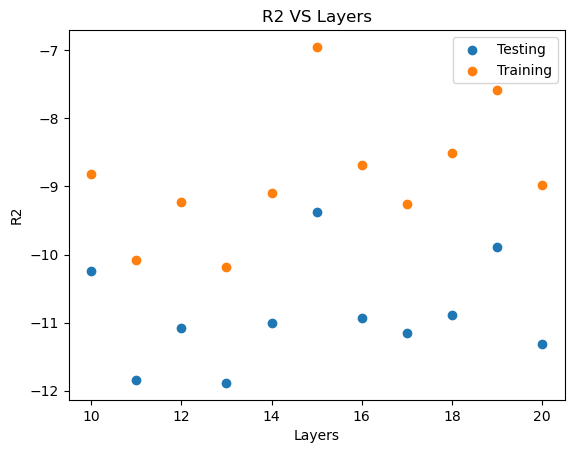

Best testing performance at 15 layers, -9.379774363881486


In [7]:
test_scores = []
train_scores = []
n_values = []
for n in range(10,21):
    model = create_model(number_of_features = 26, layers = n, nodes = 10, learning = 0.001)
    model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 0)
    
    y_pred_test = model.predict(X_test)
    test_scores.append(r2_score(y_pred_test,y_test))
    
    y_pred_train = model.predict(X_train)
    train_scores.append(r2_score(y_pred_train,y_train))
    
    n_values.append(n)
    print('Done with layers:', n)

make_plot(x = n_values, y_test = test_scores, y_train = train_scores, title = 'R2 VS Layers', x_label = 'Layers', y_label = 'R2')

print('Best testing performance at', n_values[test_scores.index(max(test_scores))], 'layers,', max(test_scores))

220/220 [==============================] - 0s 715us/step
Done with nodes: 4
220/220 [==============================] - 0s 720us/step
Done with nodes: 6
220/220 [==============================] - 0s 710us/step
Done with nodes: 8
220/220 [==============================] - 0s 724us/step
Done with nodes: 10
220/220 [==============================] - 0s 720us/step
Done with nodes: 12
220/220 [==============================] - 0s 715us/step
Done with nodes: 14
220/220 [==============================] - 0s 715us/step
Done with nodes: 16
220/220 [==============================] - 0s 770us/step
Done with nodes: 18
220/220 [==============================] - 0s 724us/step
Done with nodes: 20
220/220 [==============================] - 0s 733us/step
Done with nodes: 22


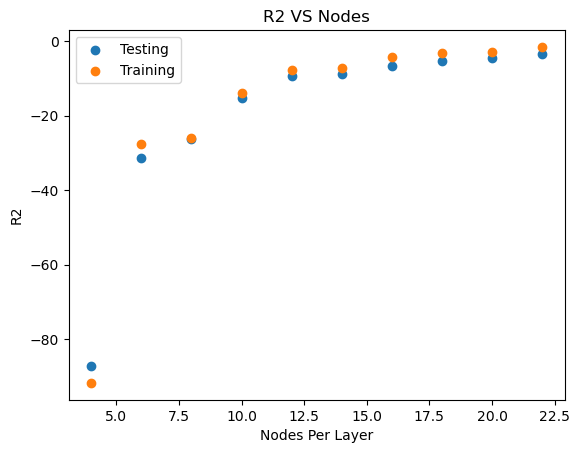

Best testing performance at 22 nodes per layer, -3.3801164905164534


In [8]:
test_scores = []
train_scores = []
n_values = []
for n in range(4,23,2):
    model = create_model(number_of_features = 26, layers = 6, nodes = n, learning = 0.001)
    model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 0)
    
    y_pred_test = model.predict(X_test)
    test_scores.append(r2_score(y_pred_test,y_test))
    
    y_pred_train = model.predict(X_train)
    train_scores.append(r2_score(y_pred_train,y_train))
    
    n_values.append(n)
    print('Done with nodes:', n)

make_plot(x = n_values, y_test = test_scores, y_train = train_scores, title = 'R2 VS Nodes', x_label = 'Nodes Per Layer', y_label = 'R2')

print('Best testing performance at', n_values[test_scores.index(max(test_scores))], 'nodes per layer,', max(test_scores))

220/220 [==============================] - 0s 738us/step
Done with batch size: 16
220/220 [==============================] - 0s 852us/step
Done with batch size: 20
220/220 [==============================] - 0s 733us/step
Done with batch size: 24
220/220 [==============================] - 0s 747us/step
Done with batch size: 28
220/220 [==============================] - 0s 692us/step
Done with batch size: 32
220/220 [==============================] - 0s 710us/step
Done with batch size: 36
220/220 [==============================] - 0s 729us/step
Done with batch size: 40
220/220 [==============================] - 0s 2ms/step
Done with batch size: 44
220/220 [==============================] - 0s 729us/step
Done with batch size: 48
220/220 [==============================] - 0s 700us/step
Done with batch size: 52


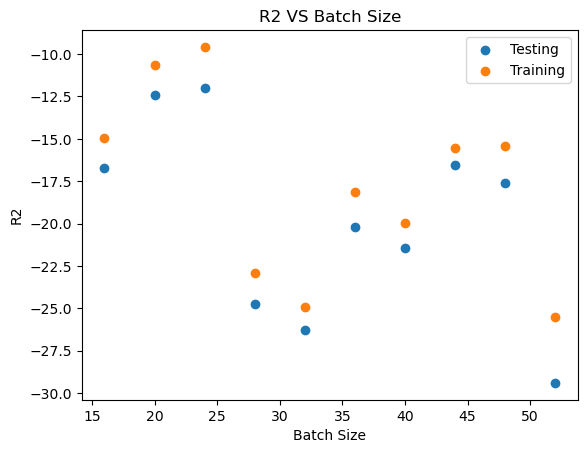

Best testing performance at batch size 24 : -11.986884399419814


In [9]:
test_scores = []
train_scores = []
n_values = []
for n in range(16,53,4):
    model = create_model(number_of_features = 26, layers = 6, nodes = 10, learning = 0.001)
    model.fit(X_train, y_train, epochs = 100, batch_size = n, verbose = 0)

    y_pred_test = model.predict(X_test)
    test_scores.append(r2_score(y_pred_test,y_test))

    y_pred_train = model.predict(X_train)
    train_scores.append(r2_score(y_pred_train,y_train))
    
    n_values.append(n)
    print('Done with batch size:', n)

make_plot(x = n_values, y_test = test_scores, y_train = train_scores, title = 'R2 VS Batch Size', x_label = 'Batch Size', y_label = 'R2')

print('Best testing performance at batch size', n_values[test_scores.index(max(test_scores))], ':', max(test_scores))

220/220 [==============================] - 0s 715us/step
Done with learning rate: 0.001
220/220 [==============================] - 0s 698us/step
Done with learning rate: 0.002
220/220 [==============================] - 0s 706us/step
Done with learning rate: 0.003
220/220 [==============================] - 0s 725us/step
Done with learning rate: 0.004
220/220 [==============================] - 0s 694us/step
Done with learning rate: 0.005
220/220 [==============================] - 0s 797us/step
Done with learning rate: 0.006
220/220 [==============================] - 0s 743us/step
Done with learning rate: 0.007
220/220 [==============================] - 0s 706us/step
Done with learning rate: 0.008
220/220 [==============================] - 0s 874us/step
Done with learning rate: 0.009000000000000001
220/220 [==============================] - 0s 718us/step
Done with learning rate: 0.01


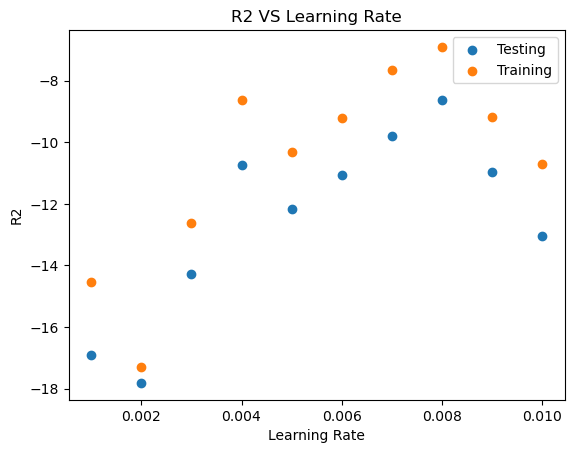

Best testing performance at learning rate 0.008 : -8.620940241492915


In [10]:
test_scores = []
train_scores = []
n_values = []
for n in range(1,11):
    model = create_model(number_of_features = 26, layers = 6, nodes = 10, learning = 0.001*n)
    model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 0)

    y_pred_test = model.predict(X_test)
    test_scores.append(r2_score(y_pred_test,y_test))

    y_pred_train = model.predict(X_train)
    train_scores.append(r2_score(y_pred_train,y_train))
    
    n_values.append(0.001*n)
    print('Done with learning rate:', 0.001*n)

make_plot(x = n_values, y_test = test_scores, y_train = train_scores, title = 'R2 VS Learning Rate', x_label = 'Learning Rate', y_label = 'R2')

print('Best testing performance at learning rate', n_values[test_scores.index(max(test_scores))], ':', max(test_scores))